## Manage Imports

In [1]:
from tensorflow.keras.applications.xception import Xception, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
#from tensorflow.keras.models import model_from_json

In [2]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
import glob
import cv2
import h5py
import os
import json
import datetime
import time
import gc
import _pickle

## Choose a Model, e.g. xception

In [4]:
%ls

dataset/  DeepFeatureExtraction.ipynb


In [3]:
%mkdir xception

In [6]:
%ls

dataset/  DeepFeatureExtraction.ipynb  xception/


In [7]:
# Configuration
model_name		= 'xception'
weights 		= 'imagenet'
data_path 		= '../dataset/plates'
features_path	= './xception/features.h5'
labels_path 	= './xception/labels.h5'

## Load the Model 

In [5]:
start = time.time()

base_model = Xception(weights=weights)
model = Model(inputs=base_model.input, outputs=base_model.get_layer('avg_pool').output)
image_size = (299, 299)

load_model_time = time.time() - start
print("[INFO] loading model time: {}".format(load_model_time))
print("[INFO] successfully loaded base model: {}".format(model_name))

[INFO] loading model time: 17.155951976776123
[INFO] successfully loaded base model: xception


## Encode the labels

In [8]:
train_labels = os.listdir(data_path)
print(train_labels)
le = LabelEncoder()
le.fit([tl for tl in train_labels])

['1981', '2003', '2014']


LabelEncoder()

## Feature Extraction

In [9]:
start = time.time()

features = []
labels   = []

i = 0
for label in train_labels:
	cur_path = data_path + "/" + label
	for image_path in glob.glob(cur_path + "/*.jpg"):   
		img = image.load_img(image_path, target_size=image_size)
		x = image.img_to_array(img)
		x = np.expand_dims(x, axis=0)
		x = preprocess_input(x)
		feature = model.predict(x)
		flat = feature.flatten()
		features.append(flat)
		labels.append(label)
		if i % 100 == 0:  # print every 100th processed image
			print("[INFO] processed - {}".format(i))
		i += 1
	print("[INFO] completed label - {}".format(label))


feature_extraction_time = time.time() - start
print("[INFO] Feature extraction time: {}".format(feature_extraction_time))

[INFO] processed - 0
[INFO] processed - 100
[INFO] completed label - 1981
[INFO] processed - 200
[INFO] processed - 300
[INFO] processed - 400
[INFO] completed label - 2003
[INFO] processed - 500
[INFO] processed - 600
[INFO] processed - 700
[INFO] processed - 800
[INFO] processed - 900
[INFO] completed label - 2014
[INFO] Feature extraction time: 62.885016679763794


In [10]:
targetNames = np.unique(labels)
le = LabelEncoder()
le_labels = le.fit_transform(labels)

print ("[STATUS] training labels: {}".format(le_labels))
print ("[STATUS] training labels shape: {}".format(le_labels.shape))

h5f_data = h5py.File(features_path, 'w')
array_of_features = np.array(features)
h5f_data.create_dataset('dataset', data=array_of_features)

print("[INFO] Feature max value: {}".format(np.amax(array_of_features)))
print("[INFO] Feature min value: {}".format(np.amin(array_of_features)))

h5f_label = h5py.File(labels_path, 'w')
h5f_label.create_dataset('dataset', data=np.array(le_labels))

h5f_data.close()
h5f_label.close()

print ("[STATUS] features and labels saved..")

[STATUS] training labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

In [11]:
print ("[STATUS] end time - {}".format(datetime.datetime.now().strftime("%Y-%m-%d %H:%M")))
print(" Loading model time: {}".format(load_model_time))
print(" Feature extraction time: {}".format(feature_extraction_time))
print(" Feature extraction time per sample: {}".format(feature_extraction_time/len(le_labels)))
gc.collect()  # garbage collection

[STATUS] end time - 2019-11-22 20:09
 Loading model time: 17.155951976776123
 Feature extraction time: 62.885016679763794
 Feature extraction time per sample: 0.06288501667976379


467

In [12]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     verticalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     verticalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()


## Train

In [22]:
test_size		= 0.20
results			= './xception/results.txt'
classifier_path = './xception/classifier.cpickle' 
seed 		    = 4444
num_classes	    = 3   # dogs, cats

## Load Saved Features

In [23]:
h5f_data = h5py.File(features_path, 'r')
h5f_label = h5py.File(labels_path, 'r')

features_string = h5f_data['dataset']
labels_string   = h5f_label['dataset']

features = np.array(features_string)
labels   = np.array(labels_string)

h5f_data.close()
h5f_label.close()

print ("[INFO] Successfully loaded {} features.".format(model_name))
print ("[INFO] features shape: {}".format(features.shape))
print ("[INFO] labels shape: {}".format(labels.shape))


[INFO] Successfully loaded xception features.
[INFO] features shape: (1000, 2048)
[INFO] labels shape: (1000,)


## Train / Test Split

In [24]:
print ("[INFO] split into training and testing data...")
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(features),
                                                                  np.array(labels),
                                                                  test_size=test_size,
                                                                  random_state=seed)

print ("[INFO] splitted train and test data...")
print ("[INFO] train data  : {}".format(trainData.shape))
print ("[INFO] test data   : {}".format(testData.shape))
print ("[INFO] train labels: {}".format(trainLabels.shape))
print ("[INFO] test labels : {}".format(testLabels.shape))

[INFO] split into training and testing data...
[INFO] splitted train and test data...
[INFO] train data  : (800, 2048)
[INFO] test data   : (200, 2048)
[INFO] train labels: (800,)
[INFO] test labels : (200,)


## Load Classifier or Create a New One

In [25]:
try:
    # load classifier from file, ie. logistic regression
    print("[INFO] loading classifier...")
    with open(classifier_path, 'rb') as fid:
        classifier_model = _pickle.load(fid)
except:
    print("[INFO] creating model/training...")
    classifier_model = LogisticRegression(solver='lbfgs', random_state=seed,  multi_class='auto', max_iter=5000)
    classifier_model.fit(trainData, trainLabels)

    # Save the model
    print("[INFO] saving classifier...")
    f = open(classifier_path, "wb")
    f.write(_pickle.dumps(classifier_model))
    f.close()

[INFO] loading classifier...


In [26]:
f = open(results, "w")
rank_1 = 0

# loop over test data
start = time.time()
for (label, features) in zip(testLabels, testData):
	predictions = classifier_model.predict_proba(np.atleast_2d(features))[0]
	predictions = np.argsort(predictions)[::-1][:5]
	# rank-1 prediction increment
	if label == predictions[0]:
		rank_1 += 1

# convert accuracies to percentages
rank_1 = (rank_1 / float(len(testLabels))) * 100

# write the accuracies to file
f.write("rank-1: {}\n".format(rank_1))
print("[INFO] rank 1 accuracy: {}".format(rank_1))

# evaluate the model of test data
preds = classifier_model.predict(testData)

# write the classification report to file
print(classification_report(testLabels, preds))
f.write("{}\n".format(classification_report(testLabels, preds)))
f.close()

[INFO] rank 1 accuracy: 96.0
              precision    recall  f1-score   support

           0       0.82      0.92      0.87        25
           1       0.95      0.93      0.94        60
           2       1.00      0.98      0.99       115

    accuracy                           0.96       200
   macro avg       0.92      0.95      0.93       200
weighted avg       0.96      0.96      0.96       200



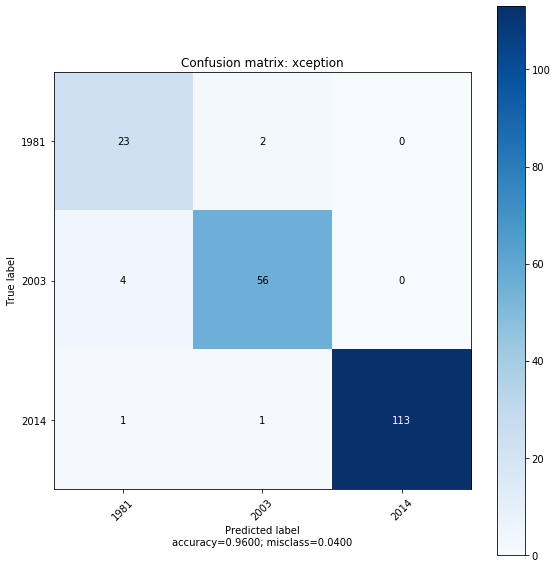

In [27]:
labels = sorted(list(os.listdir(data_path)))
title = 'Confusion matrix: ' + model_name
target_names = sorted(list(os.listdir(data_path)))
cm =confusion_matrix(testLabels, preds)
plot_confusion_matrix(cm, target_names, title=title, cmap=None, normalize=False)

In [28]:
print(labels)

['1981', '2003', '2014']


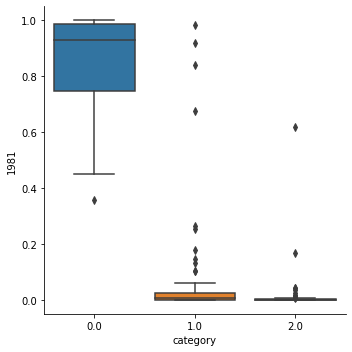

In [31]:
probs  = classifier_model.predict_proba(testData)
output = np.append(testLabels[:,None],probs, axis=1)
df     = pd.DataFrame(output, columns = ['category'] + labels)
sns.catplot(x="category", y="1981", data=df, kind="box");   # kind="violin"

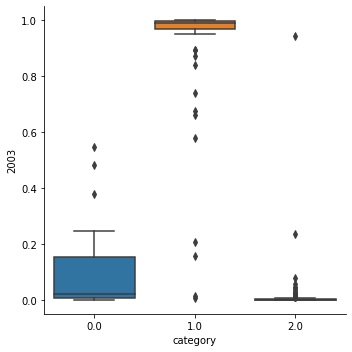

In [32]:
sns.catplot(x="category", y="2003", data=df, kind="box");   # kind="violin"

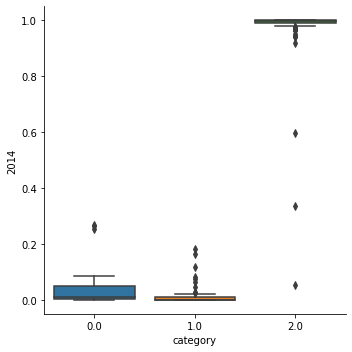

In [33]:
sns.catplot(x="category", y="2014", data=df, kind="box");   # kind="violin"